In [1]:
import nltk, os, matplotlib as mlt, sys
from matplotlib import pyplot as plt
import sklearn as sk, pandas as pd, numpy as np
import re, string as str
from nltk.corpus import stopwords
import time
os.chdir("E:\\CSE 258\\Homework\\Assignment2\\")
# nltk.download('punkt')
# nltk.download("stopwords")
# nltk.download("wordnet")

In [5]:
df = pd.read_csv("nyt_unclean.txt", encoding='utf-8')

In [7]:
df.text = df.text.str.replace("\n", "")
print df.text[0]

Times Square, the famed Manhattan crossroads, is where Americans often mark moments of great change, and so, too, as Wednesday dawned. But instead of its usual buzz and bustle, it was filled with an eerie silence.The costumed cartoon characters melted away. There was no music or sound from the news broadcast on the giant screens. And thousands of people, their faces illuminated by Times Square’s flashing advertisements, stood watching and waiting as Donald J. Trump steamrollered toward victory over Hillary Clinton.“Interesting evening, isn’t it?” said Graham Simpson, an Englishman who had come to New York last weekend to run a marathon. “The world seems to have turned on its head.”Since arriving in the United States in July to cover this tumultuous election from a foreigner’s perspective, I have sought to understand voters’ motivations — particularly when it came to Mr. Trump, an unorthodox outsider who had upended the political system. After traveling the country, I spent the final da

In [8]:
df['nExclams'] =  df.text.str.count("!")

In [9]:
def count_caps(s):
    return np.sum([x.isupper() for x in s.split()])

df['Capital Words'] = df.text.apply(count_caps)

In [11]:
# Tokenizing text into bags of words
from nltk.tokenize import word_tokenize
def tokenize_s(s):
    return word_tokenize(s)#.decode('utf-8'))
df.text = df.text.apply(tokenize_s)

In [12]:
# Removing punctuation
import regex as re
import string
def remove_puncs(old_s):
    new_s = []
    for token in old_s:
        new_token = re.sub(ur"[0-9]+|\p{P}+", u"", token)
        if not new_token == u"":
            new_s.append(new_token)
    return new_s

df.text = df.text.apply(remove_puncs)

In [14]:
# Cleaning text of stopwords
def remove_stopwords(old_s):
    new_s = []
    for word in old_s:
        if not word in stopwords.words('english'):
            new_s.append(word)
    return new_s

for i in range(len(df.text)):
    df.text[i] = remove_stopwords(df.text[i])
    if i%500 == 0:
        print(i)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500


In [17]:
# Saving it for the future use
df.to_csv("NYT_Tokenized and stopwords removed.csv", index = False, encoding = 'utf-8')

In [22]:
# Stemming and Lemmatizing
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

tracer = np.arange(25)*500
start_time = time.time()
for i in range(len(df.text)):
    final_doc = []
    for word in df.text[i]:
        word = porter.stem(word)
        word = wordnet.lemmatize(word)
        final_doc.append(word)
    df.text[i] = final_doc
    if i in tracer:
        print(i,"th doc processed in %s seconds from the start"%(time.time() - start_time))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(0, 'th doc processed in 0.273000001907 seconds from the start')
(500, 'th doc processed in 118.343999863 seconds from the start')
(1000, 'th doc processed in 237.286999941 seconds from the start')
(1500, 'th doc processed in 354.562000036 seconds from the start')
(2000, 'th doc processed in 473.812999964 seconds from the start')
(2500, 'th doc processed in 594.147000074 seconds from the start')
(3000, 'th doc processed in 716.237999916 seconds from the start')
(3500, 'th doc processed in 839.835999966 seconds from the start')
(4000, 'th doc processed in 963.142999887 seconds from the start')
(4500, 'th doc processed in 1092.49499989 seconds from the start')
(5000, 'th doc processed in 1223.49099994 seconds from the start')
(5500, 'th doc processed in 1347.11999989 seconds from the start')
(6000, 'th doc processed in 1474.09899998 seconds from the start')
(6500, 'th doc processed in 1600.2019999 seconds from the start')
(7000, 'th doc processed in 1728.4519999 seconds from the start')


In [23]:
# Saving it for the future use
df.to_csv("NYT_Tokenized_stemmed_lemmatized with stopwords removed.csv", index = False, encoding = 'utf-8')

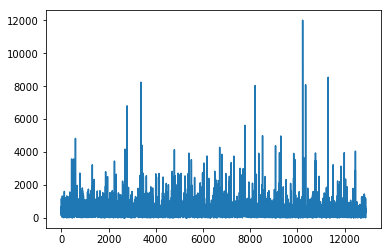

In [24]:
lengths = []
for doc in df.text:
    lengths.append(len(doc))

x = range(len(df.text))
plt.plot(x, lengths)
plt.show()